In [3]:
import cx_Oracle
import pandas as pd

f=open("pwds.txt","r")
lines=f.readlines()
usr=lines[0]
pw=lines[1]
f.close()
path = 'C:\ORACLE\instantclient_19_11'

host = 'ALASTRIA'
port = 1524
service = 'CW1T2'
cx_Oracle.init_oracle_client(lib_dir= path)

cx_Oracle.clientversion()  
dsn_tns = cx_Oracle.makedsn(host, port, service_name=service)

conn = cx_Oracle.connect(user=usr, password=pw, dsn=dsn_tns)

c = conn.cursor()

no_sus = """

select "WBC_CASE_D"."CASE_NUM" "Case_Number", "WBC_DATE_D_Start"."CALENDAR_DATE" "Start_Date", "WBC_DATE_D_Exit"."CALENDAR_DATE" "Exit_Date", avg("coguda30"."WEEKS_TO_ACHV_SUST_EMP_ELAPSED") "c4", "WBC_ES_STAGE_OF_SERVICE_D"."STAGE_OF_SERVICE_NAME" "Stage_of_Employment_Service1"
 from "CDW"."WBC_CASE_D" "WBC_CASE_D", "CDW"."WBC_DATE_D" "WBC_DATE_D_Start", "CDW"."WBC_DATE_D" "WBC_DATE_D_Exit", "CDW"."WBC_CASE_F" "coguda30", "CDW"."WBC_OFFICE_D" "coguda31", "CDW"."WBC_ES_STAGE_OF_SERVICE_D" "WBC_ES_STAGE_OF_SERVICE_D"
 where  "coguda30"."OFFICE_ORG_WID"="coguda31"."OFFICE_ORG_WID" and "WBC_DATE_D_Start"."FISCAL_YEAR">2019 and "coguda30"."ES_SRV_PLN_TYPE" in ('Employment Services') and "WBC_ES_STAGE_OF_SERVICE_D"."STAGE_OF_SERVICE_NAME" in ('Before Sustainable Employment Achieved', 'Left Before Outcome', 'Not Available') and "coguda30"."CASE_TYPE_WID"=1 and "coguda30"."SNAPSHOT_DT_WID"=(
select snapshot_dt_wid
 from cdw.wbc_run_ctl_d) and "coguda30"."CASE_WID"="WBC_CASE_D"."CASE_WID" and "coguda30"."ES_STAGE_OF_SERVICE_WID"="WBC_ES_STAGE_OF_SERVICE_D"."ES_STAGE_OF_SERVICE_WID" and "WBC_DATE_D_Start"."DATE_WID"="coguda30"."PLAN_START_DT_WID" and "coguda30"."PLAN_CLOSED_DT_WID"="WBC_DATE_D_Exit"."DATE_WID"
 group by "WBC_CASE_D"."CASE_NUM", "WBC_DATE_D_Exit"."CALENDAR_DATE", "WBC_DATE_D_Start"."CALENDAR_DATE", "WBC_ES_STAGE_OF_SERVICE_D"."STAGE_OF_SERVICE_NAME"


"""

sus = """

select "WBC_CASE_D"."CASE_NUM" "Case_Number", "WBC_DATE_D_Start"."CALENDAR_DATE" "Start_Date", "WBC_DATE_D_Exit"."CALENDAR_DATE" "Exit_Date", avg("coguda30"."WEEKS_TO_ACHV_SUST_EMP_ELAPSED") "c4", "WBC_ES_STAGE_OF_SERVICE_D"."STAGE_OF_SERVICE_NAME" "Stage_of_Employment_Service1"
 from "CDW"."WBC_CASE_D" "WBC_CASE_D", "CDW"."WBC_DATE_D" "WBC_DATE_D_Start", "CDW"."WBC_DATE_D" "WBC_DATE_D_Exit", "CDW"."WBC_CASE_F" "coguda30", "CDW"."WBC_OFFICE_D" "coguda31", "CDW"."WBC_ES_STAGE_OF_SERVICE_D" "WBC_ES_STAGE_OF_SERVICE_D"
 where "coguda30"."OFFICE_ORG_WID"="coguda31"."OFFICE_ORG_WID" and "WBC_DATE_D_Start"."FISCAL_YEAR">2019 and "coguda30"."ES_SRV_PLN_TYPE" in ('Employment Services') and "WBC_ES_STAGE_OF_SERVICE_D"."STAGE_OF_SERVICE_NAME" in ('Left Before Completing Sustainment', 'Left After Completing Sustainment', 'In Sustainment') and "coguda30"."CASE_TYPE_WID"=1 and "coguda30"."SNAPSHOT_DT_WID"=(
select snapshot_dt_wid
 from cdw.wbc_run_ctl_d) and "coguda30"."CASE_WID"="WBC_CASE_D"."CASE_WID" and "coguda30"."ES_STAGE_OF_SERVICE_WID"="WBC_ES_STAGE_OF_SERVICE_D"."ES_STAGE_OF_SERVICE_WID" and "WBC_DATE_D_Start"."DATE_WID"="coguda30"."PLAN_START_DT_WID" and "coguda30"."PLAN_CLOSED_DT_WID"="WBC_DATE_D_Exit"."DATE_WID"
 group by "WBC_CASE_D"."CASE_NUM", "WBC_DATE_D_Exit"."CALENDAR_DATE", "WBC_DATE_D_Start"."CALENDAR_DATE", "WBC_ES_STAGE_OF_SERVICE_D"."STAGE_OF_SERVICE_NAME"




"""
df = pd.read_sql(sus, con=conn)
print(df.shape)
df2 = pd.read_sql(no_sus, con=conn)
print(df2.shape)



(25277, 5)
(37029, 5)


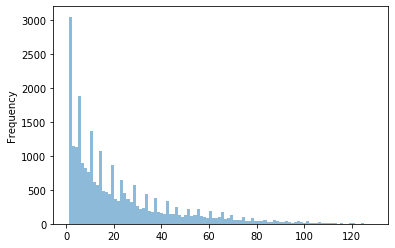

In [4]:
df.c4.plot.hist(bins=100, alpha=0.5)

In [5]:
link = """
select distinct "WBC_CASE_D"."CASE_NUM" "Case_Number", "WBC_CATCHMENT_AREA_D"."REGION_CODE" "Region_Code", "WBC_CATCHMENT_AREA_D"."CATCHMENT" "Catchment", "WBC_OES_APPLICATION_D"."EXPLAINING_TO_OTHERS" "Explaining_to_Others", "WBC_OES_APPLICATION_D"."GET_ALONG_WITH_OTHERS" "Getting_Along_with_Others", "WBC_OES_APPLICATION_D"."LEARNING_NEW_THINGS" "New_Things", "WBC_OES_APPLICATION_D"."ORGANIZING_INFORMATION" "Organizing", "WBC_OES_APPLICATION_D"."PROBLEM_SOLVING" "Problem_Solving", "WBC_OES_APPLICATION_D"."READING_INFORMATION" "Reading_and_Understanding", "WBC_OES_APPLICATION_D"."USING_COMPUTERS" "Using_Computers", "WBC_OES_APPLICATION_D"."CREATING_DOCUMENTS" "Working_with_Documents", "WBC_OES_APPLICATION_D"."WORKING_WITH_MATH" "Working_with_Math", "WBC_OES_APPLICATION_D"."WRITING_INFORMATION" "Writing", "WBC_OES_APPLICATION_D"."FRANCOPHONE" "Francophone", "WBC_OES_APPLICATION_D"."RECENT_IMMIGRANT" "Recent_Immigrant", "WBC_OES_APPLICATION_D"."INDIGENOUS_PERSON" "Indigenous_Person", "WBC_OES_APPLICATION_D"."PERSON_WITH_DISABILITY" "Person_with_a_Disability", "WBC_OES_APPLICATION_D"."SURVIVOR_OF_VIOLENCE" "Survivor_of_Violence_or_Abuse", "WBC_OES_APPLICATION_D"."LANGUAGE" "Language19", "WBC_OES_APPLICATION_D"."LANGUAGE_OTHER" "Other_Language", "WBC_OES_APPLICATION_D"."DISABILITY_OTHER_DESC" "Other_Disability_Discription", "WBC_OES_APPLICATION_D"."STATUS_IN_CANADA_OTHER_DESC" "c22", "WBC_OES_APPLICATION_D"."SCHOOL_LEVEL" "Education_Level", "WBC_OES_APPLICATION_D"."CURRENTLY_IN_SCHOOL" "Currently_In_School", "WBC_OES_APPLICATION_D"."CURRENTLY_IN_SCHOOL_STATUS" "c25", "WBC_OES_APPLICATION_D"."AREA_OF_STUDY" "Education_Area_of_Study", "WBC_OES_APPLICATION_D"."INDIGENOUS_TYPE" "Indigenous_Type", "WBC_OES_APPLICATION_D"."STATUS_INDIAN" "Status_Indian", "WBC_OES_APPLICATION_D"."DRENA_REQUIRED" "DRENA_Required", "WBC_OES_APPLICATION_D"."LEGAL_TO_WORK" "c30", "WBC_OES_APPLICATION_D"."CHANGE_OF_CIRCUMSATNCE" "Change_of_Circumstance", "WBC_OES_APPLICATION_D"."CHANGE_OF_CIRCUMSATNCE_REASON" "Change_of_Circumstance_Reason", "WBC_OES_APPLICATION_D"."BCEID_GUID" "BCeID_GUID", "WBC_OES_APPLICATION_D"."CLIENT_BCEID" "Client_BCeID", "WBC_OES_APPLICATION_D"."CLIENT_CONSENT" "Client_Consent", "WBC_OES_APPLICATION_D"."PROGRAM_TYPE" "Program_Type", "WBC_OES_APPLICATION_D"."CURRENT_EMPLOYMENT_INSURANCE" "c37", "WBC_OES_APPLICATION_D"."PAST_EMPLOYMENT_INSURANCE" "c38", "WBC_OES_APPLICATION_D"."PAST_FIVE_YEARS_WORK" "c39", "WBC_OES_APPLICATION_D"."BCEA_INCOME_ASSISTANCE" "c40", "WBC_OES_APPLICATION_D"."INCOME_ASSISTANCE_DURATION" "c41", "WBC_OES_APPLICATION_D"."NON_BC_INCOME_ASSISTANCE" "c42", "WBC_OES_APPLICATION_D"."NON_BC_INCOME_ASSISTANCE_CNT" "c43", "WBC_OES_APPLICATION_D"."OTHER_FUNDING" "c44", "WBC_OES_APPLICATION_D"."EMPLOYMENT_FACTOR_AGE" "Age", "WBC_OES_APPLICATION_D"."EMPLOYMENT_FACTOR_LACK_HOUSING" "Lack_Housing", "WBC_OES_APPLICATION_D"."EMPLOYMENT_FACTOR_ADDICTION" "Addiction", "WBC_OES_APPLICATION_D"."VISIBLE_MINORITY" "Visible_Minority", "WBC_OES_APPLICATION_D"."CHILDREN_AT_HOME" "Child_at_Home", "WBC_OES_APPLICATION_D"."SINGLE_PARENT" "Single_Parent", "WBC_OES_APPLICATION_D"."DISABILITY_PHYSICAL" "Physical_Disability", "WBC_OES_APPLICATION_D"."DISABILITY_LEARNING" "Learning_Disablilit", "WBC_OES_APPLICATION_D"."DEVELOPMENTAL_DISABILITY" "Developmental_Disability", "WBC_OES_APPLICATION_D"."DISABILITY_VISUAL" "Visual_Disability", "WBC_OES_APPLICATION_D"."DISABILITY_HEARING" "Hearing_Disability", "WBC_OES_APPLICATION_D"."DISABILITY_MENTAL_HEALTH" "Mental_Health_Condition", "WBC_OES_APPLICATION_D"."DISABILITY_CHRONIC_ILLNESS" "Chronic_Illness", "WBC_OES_APPLICATION_D"."DISABILITY_SHORT_TERM_ILLNESS" "Short_term_Illness", "WBC_OES_APPLICATION_D"."DISABILITY_OTHER" "Other_Disability", "WBC_OES_APPLICATION_D"."INTERVIEW_METHOD_IN_PERSON" "Interview_In_Person", "WBC_OES_APPLICATION_D"."EMPLOYED" "Client_Employed_Flag", "WBC_OES_APPLICATION_D"."UNEMP_PERSONAL_SITUATION" "c62", "WBC_OES_APPLICATION_D"."UNEMP_KEEPING_JOBS" "Unemployed___Keeping_Jobs", "WBC_OES_APPLICATION_D"."UNEMP_DISABLTY_SUPPORTS_NEEDED" "c64", "WBC_OES_APPLICATION_D"."UNEMP_KIND_OF_WORK_UNKNOWN" "c65", "WBC_OES_APPLICATION_D"."UNEMP_FNCL_SUPPORTS_NEEDED" "c66", "WBC_OES_APPLICATION_D"."UNEMP_TRAINING_NEEDED" "Unemployed___Training_Needed", "WBC_OES_APPLICATION_D"."UNEMP_JOB_SEARCH_HELP_NEEDED" "c68", "WBC_OES_APPLICATION_D"."UNEMP_JOB_OFFER_LACK_RESOURCES" "Unemployed___Lack_Resources", "WBC_OES_APPLICATION_D"."UNEMP_RETURN_TO_SAME_WORK" "c70", "WBC_OES_APPLICATION_D"."UNEMP_OTHER_FACTOR" "Unemployed___Other", "WBC_OES_APPLICATION_D"."UNEMP_OTHER_FACTOR_DESC" "Unemployed___Other_Description", "WBC_OES_APPLICATION_D"."EMP_SELF_EMPLOYED" "Employed___Self_Employed", "WBC_OES_APPLICATION_D"."EMP_LOSING_JOB" "Employed___Losing_Job", "WBC_OES_APPLICATION_D"."EMP_DISABLTY_SUPPORTS_NEEDED" "Employed___Disability_Supports", "WBC_OES_APPLICATION_D"."EMP_JOB_OFFER_LACK_RESOURCES" "Employed___Lack_Resources", "WBC_OES_APPLICATION_D"."EMP_NEED_MORE_HOURS_OF_WORK" "Employed___Need_More_hours", "WBC_OES_APPLICATION_D"."EMP_TRAINING_NEEDED" "Employed___Training", "WBC_OES_APPLICATION_D"."EMP_NEW_LINE_OF_WORK" "Employed___New_Line_of_Work", "WBC_OES_APPLICATION_D"."EMP_SEEKEING_CHANGE" "Employed___Dislike_Current", "WBC_OES_APPLICATION_D"."EMP_CHALLENGING_JOB" "Employed___More_Challenge", "WBC_OES_APPLICATION_D"."EMPLOYMENT_FACTOR_OTHER" "Employed___Other", "WBC_OES_APPLICATION_D"."EMPLOYMENT_FACTOR_OTHER_DESC" "Employed___Other_Description", "WBC_OES_APPLICATION_D"."EMPLOYMENT_SITUATION_LIST" "Employment_Situation_List", "WBC_OES_APPLICATION_D"."INTERVIEW_METHOD_PHONE" "Interview_By_Telephone", "WBC_OES_APPLICATION_D"."INTERVIEW_METHOD_VIDEO_CALL" "Interview_By_Video_Call", "WBC_OES_APPLICATION_D"."INTERVIEW_METHOD_WITH_ATTNDENT" "Interview_With_Attendant", "WBC_OES_APPLICATION_D"."INTERVIEW_METHOD_OTHER" "Interview_Other", "WBC_OES_APPLICATION_D"."EMPLOYMENT_GOAL" "Employment_Goal", "WBC_OES_APPLICATION_D"."HOURS_PER_WEEK" "Hours_per_Week_Goal", "WBC_OES_APPLICATION_D"."WAGE_PER_HOUR" "Wage_Per_Hour_Goal", "WBC_OES_APPLICATION_D"."EMPLOYMENT_GOAL_SEASONAL" "Goal_is_Seasonal", "WBC_OES_APPLICATION_D"."EMPLOYMENT_GOAL_CASUAL" "Goal_is_Casual", "WBC_OES_APPLICATION_D"."EMPLOYMENT_GOAL_RELOCATE" "Can_Relocate", "WBC_OES_APPLICATION_D"."EMPLOYMENT_GOAL_TRANSPORT" "Has_Transportation", "WBC_OES_APPLICATION_D"."PORTAL_APPLICATION_NUMBER" "OES_Application_Num", "WBC_OES_APPLICATION_D"."OFFICE" "Office", "WBC_OES_APPLICATION_D"."CATCHMENT" "Catchment_Selected", "WBC_OES_APPLICATION_D"."SERVICE_SELECTED" "Service_Selected", "WBC_OES_APPLICATION_D"."ACCEPTED_INTO_CASE_MGMT" "Accepted_into_Case_Management", "WBC_OES_APPLICATION_D"."NOTACCEPT_CASE_MGMT_OTHER_DESC" "c101", "WBC_OES_APPLICATION_D"."EXPLORE_WITH_CLIENT" "Explore_with_Client"
 from ((("CDW"."WBC_OFFICE_D" "WBC_OFFICE_D" INNER JOIN (
select "WBC_CATCHMENT_AREA_D"."CATCHMENT_AREA_WID" "CATCHMENT_AREA_WID", "WBC_CATCHMENT_AREA_D"."CATCHMENT" "CATCHMENT", "WBC_CATCHMENT_AREA_D"."REGION_CODE" "REGION_CODE"
 from "CDW"."WBC_CATCHMENT_AREA_D" "WBC_CATCHMENT_AREA_D"
 ) "WBC_CATCHMENT_AREA_D" on "WBC_OFFICE_D"."CATCHMENT_AREA_WID"="WBC_CATCHMENT_AREA_D"."CATCHMENT_AREA_WID") INNER JOIN (
select "WBC_OES_APPLICATION_F"."TAAAPA_WID" "TAAAPA_WID", "WBC_OES_APPLICATION_F"."OFFICE_ORG_WID" "OFFICE_ORG_WID", "WBC_OES_APPLICATION_F"."CASE_WID" "CASE_WID"
 from "CDW"."WBC_OES_APPLICATION_F" "WBC_OES_APPLICATION_F"
) "WBC_OES_APPLICATION_F" on "WBC_OES_APPLICATION_F"."OFFICE_ORG_WID"="WBC_OFFICE_D"."OFFICE_ORG_WID") INNER JOIN "CDW"."WBC_CASE_D" "WBC_CASE_D" on "WBC_OES_APPLICATION_F"."CASE_WID"="WBC_CASE_D"."CASE_WID") LEFT OUTER JOIN "CDW"."WBC_OES_APPLICATION_D" "WBC_OES_APPLICATION_D" on "WBC_OES_APPLICATION_F"."TAAAPA_WID"="WBC_OES_APPLICATION_D"."TAAAPA_WID"



"""
link = pd.read_sql(link, con=conn)
print(link.head)
link2 = link[link['Case_Number'].isin(df['Case_Number'])]
print(link2.shape)
data = link2

<bound method NDFrame.head of             Case_Number Region_Code                      Catchment  \
0         1-56052045193        EDR1          05-ES COWICHAN VALLEY   
1                     0        EDR2               17-ES TRI-CITIES   
2       1-421181-191989        EDR3        30-ES THOMPSON - NICOLA   
3         1-56177037887        EDR2                  24-ES BURNABY   
4         1-57127199186        EDR2          14-ES VANCOUVER SOUTH   
...                 ...         ...                            ...   
123207  1-421193-429015         UNK       Source Value was Invalid   
123208    1-63799368650        EDR1  ASSISTIVE TECHNOLOGY SERVICES   
123209    1-58288244815        EDR2            APPRENTICE SERVICES   
123210  1-421189-197001        EDR2            APPRENTICE SERVICES   
123211    1-59026100477        EDR2            APPRENTICE SERVICES   

       Explaining_to_Others Getting_Along_with_Others             New_Things  \
0         I am good at this         I am good at 

In [25]:
for x in data.columns:
    if x[0] == 'c':
        print(x)

data.c22.plot.hist(bins=100, alpha=0.5)

c22
c25
c30
c37
c38
c39
c40
c41
c42
c43
c44
c62
c64
c65
c66
c68
c70
c101


TypeError: no numeric data to plot

In [90]:
l = []
for col in data.columns:
    #print("--------COLUMN--------")
    if data[col].nunique() > 100:
        print(col)
        
        if (col != 'Case_Number') & (col != 'Wage_Per_Hour_Goal'):
            l.append(col)

    #print(data[col].nunique())
data = data.drop(l, axis = 1)
print(data.dtypes)
for x in data.columns:
    print(x)
    print(data[x].nunique())

Case_Number
Other_Language
Other_Disability_Discription
Education_Area_of_Study
Change_of_Circumstance_Reason
BCeID_GUID
Client_BCeID
Unemployed___Other_Description
Employed___Other_Description
Employment_Situation_List
Employment_Goal
Wage_Per_Hour_Goal
OES_Application_Num
Office
Explore_with_Client
Case_Number                      object
Region_Code                      object
Catchment                        object
Explaining_to_Others             object
Getting_Along_with_Others        object
                                  ...  
Has_Transportation               object
Catchment_Selected               object
Service_Selected                 object
Accepted_into_Case_Management    object
c101                             object
Length: 89, dtype: object
Case_Number
22629
Region_Code
7
Catchment
45
Explaining_to_Others
2
Getting_Along_with_Others
2
New_Things
2
Organizing
2
Problem_Solving
2
Reading_and_Understanding
2
Using_Computers
2
Working_with_Documents
2
Working_with_Math
2
W

object
<bound method NDFrame.head of            Case_Number  c4
0      1-421153-145231  42
1      1-421153-333224  12
2      1-421153-334446   4
3      1-421153-383868  11
4      1-421153-384913  11
...                ...  ..
23226    1-64324757911   3
23227    1-64364496656   2
23228    1-64709848423   1
23229    1-64677850033   1
23230    1-64586373569   1

[23231 rows x 2 columns]>


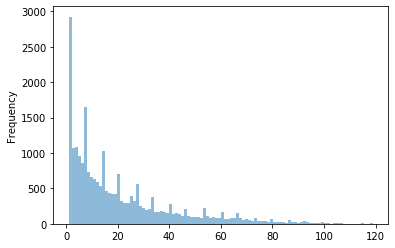

In [102]:
print(data['Case_Number'].dtypes)
pp = df[['Case_Number', 'c4']]
print(pp.head)
tt=data.merge(df[['Case_Number', 'c4']], on = 'Case_Number', how = 'left')
tt.c4.plot.hist(bins=100, alpha=0.5)

In [103]:
from sklearn import preprocessing
tt=tt.drop('Case_Number', axis = 1)
tt=tt.drop('Wage_Per_Hour_Goal', axis = 1)
tst = tt
#print(tst.dtypes)
#le = preprocessing.LabelEncoder()
le = preprocessing.OneHotEncoder()

# for col in tst.columns:
#     if col != 'c4':
#         tst[col] = le.fit_transform(tst[col].astype(str))

# print(tst.head)
features = tst.drop('c4', axis = 1)
label = tst['c4']
for col in features.columns:
    features[col]=features[col].astype(str)

le.fit(features)
features = pd.DataFrame(le.transform(features).toarray())

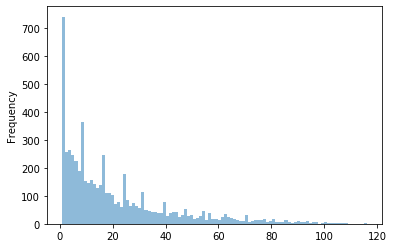

In [104]:
# features = tst.drop('c4', axis = 1)
# label = tst['c4']
#tst.c4.plot.hist(bins=100, alpha=0.5)

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features, label)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)
model = KNeighborsClassifier(n_neighbors=3)

# Train the model using the training sets
model.fit(x_train,y_train)
y_test.plot.hist(bins=100, alpha=0.5)

In [105]:
y_pred = model.predict(x_test)
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error
print(confusion_matrix(y_test, y_pred))
mse = mean_squared_error(y_test, y_pred)
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

[[170  56  29 ...   0   0   0]
 [ 54  46  36 ...   0   0   0]
 [ 42  28  28 ...   0   0   0]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   1   0 ...   0   0   0]
 [  0   0   1 ...   0   0   0]]
The mean squared error (MSE) on test set: 676.5771


In [106]:
from sklearn import datasets, ensemble
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import math
params = {'n_estimators': 500,
          'max_depth': 4,
          'min_samples_split': 5,
          'learning_rate': 0.01,
          'loss': 'ls'}

reg = ensemble.GradientBoostingRegressor(**params)
reg.fit(x_train, y_train)

mse = mean_squared_error(y_test, reg.predict(x_test))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

y_pred = reg.predict(x_test)

mse = math.sqrt(mean_squared_error(y_test, y_pred))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

The mean squared error (MSE) on test set: 405.5841
The mean squared error (MSE) on test set: 20.1391


In [107]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='adam', alpha=1e-4,hidden_layer_sizes=(10, 10), random_state=1, max_iter = 2000)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print(classification_report(y_test, y_pred.round()))
print(confusion_matrix(y_test, y_pred.round()))
mse = math.sqrt(mean_squared_error(y_test, y_pred))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

              precision    recall  f1-score   support

           1       0.18      0.62      0.27       451
           2       0.06      0.13      0.08       289
           3       0.06      0.09      0.07       255
           4       0.05      0.18      0.08       264
           5       0.05      0.18      0.07       245
           6       0.08      0.02      0.03       223
           7       0.04      0.01      0.02       188
           8       0.03      0.07      0.05       194
           9       0.06      0.06      0.06       170
          10       0.04      0.03      0.03       154
          11       0.12      0.02      0.04       147
          12       0.04      0.01      0.01       156
          13       0.06      0.04      0.05       141
          14       0.04      0.01      0.01       128
          15       0.04      0.01      0.01       140
          16       0.00      0.00      0.00       119
          17       0.00      0.00      0.00       126
          18       0.00    

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [108]:
from sklearn.decomposition import PCA
# Make an instance of the Model
pca = PCA(.90)
pca.fit(x_train)
print(pca.n_components_)
x_train_pca = pca.transform(x_train)
x_test_pca = pca.transform(x_test)

192


In [109]:
reg = ensemble.GradientBoostingRegressor(**params)
reg.fit(x_train_pca, y_train)

mse = mean_squared_error(y_test, reg.predict(x_test_pca))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

y_pred = reg.predict(x_test_pca)

mse = math.sqrt(mean_squared_error(y_test, y_pred))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

The mean squared error (MSE) on test set: 414.0211
The mean squared error (MSE) on test set: 20.3475


In [110]:
model = KNeighborsClassifier(n_neighbors=5)

# Train the model using the training sets
model.fit(x_train_pca,y_train)
y_pred = model.predict(x_test_pca)
mse = math.sqrt(mean_squared_error(y_test, y_pred))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

The mean squared error (MSE) on test set: 26.9062


In [1]:

import numpy as np
y_train.mean()
bench = pd.Series(np.tile(y_train.mean(), y_train.size))
mse = math.sqrt(mean_squared_error(y_train, bench))
print("The mean squared error (MSE) OF EVERYTHING IS: {:.4f}".format(mse))

NameError: name 'y_train' is not defined

In [113]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='adam', alpha=1e-4,hidden_layer_sizes=(10, 10), random_state=1, max_iter = 2000)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print(classification_report(y_test, y_pred.round()))
print(confusion_matrix(y_test, y_pred.round()))
mse = math.sqrt(mean_squared_error(y_test, y_pred))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

              precision    recall  f1-score   support

           1       0.18      0.62      0.27       451
           2       0.06      0.13      0.08       289
           3       0.06      0.09      0.07       255
           4       0.05      0.18      0.08       264
           5       0.05      0.18      0.07       245
           6       0.08      0.02      0.03       223
           7       0.04      0.01      0.02       188
           8       0.03      0.07      0.05       194
           9       0.06      0.06      0.06       170
          10       0.04      0.03      0.03       154
          11       0.12      0.02      0.04       147
          12       0.04      0.01      0.01       156
          13       0.06      0.04      0.05       141
          14       0.04      0.01      0.01       128
          15       0.04      0.01      0.01       140
          16       0.00      0.00      0.00       119
          17       0.00      0.00      0.00       126
          18       0.00    

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


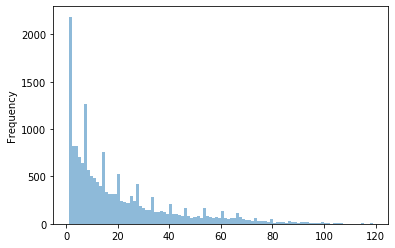

In [112]:
y_train.plot.hist(bins=100, alpha=0.5)

In [26]:
q = """select "WBC_CASE_D"."CASE_NUM" "Case_Number", avg("coguda10"."WEEKS_TO_ACHV_SUST_EMP_ELAPSED") "c2", "WBC_DATE_D_Start"."DAY_DT" "Start_Day_Date", avg("coguda10"."WEEKS_TO_ACHV_SUST_EMP_IN_PROG") "c4", "WBC_ES_STAGE_OF_SERVICE_D"."IS_ACTIVE_NAME" "Is_Active"
 from "CDW"."WBC_CASE_D" "WBC_CASE_D", "CDW"."WBC_CASE_F" "coguda10", "CDW"."WBC_OFFICE_D" "coguda11", "CDW"."WBC_ES_STAGE_OF_SERVICE_D" "WBC_ES_STAGE_OF_SERVICE_D", "CDW"."WBC_DATE_D" "WBC_DATE_D_Start"
 where  "coguda10"."OFFICE_ORG_WID"="coguda11"."OFFICE_ORG_WID" and "WBC_DATE_D_Start"."FISCAL_YEAR">=2019 and "WBC_CASE_D"."CASE_TYPE_CD" in ('Employment Services') and "coguda10"."CASE_TYPE_WID"=1 and "coguda10"."SNAPSHOT_DT_WID"=(
select snapshot_dt_wid
 from cdw.wbc_run_ctl_d) and "coguda10"."CASE_WID"="WBC_CASE_D"."CASE_WID" and "coguda10"."ES_STAGE_OF_SERVICE_WID"="WBC_ES_STAGE_OF_SERVICE_D"."ES_STAGE_OF_SERVICE_WID" and "WBC_DATE_D_Start"."DATE_WID"="coguda10"."PLAN_START_DT_WID"
 group by "WBC_CASE_D"."CASE_NUM", "WBC_ES_STAGE_OF_SERVICE_D"."IS_ACTIVE_NAME", "WBC_DATE_D_Start"."DAY_DT"

"""
link = pd.read_sql(q, con=conn)
print(link.head)
link2 = link[link['Case_Number'].isin(df['Case_Number'])]
print(link2.columns)


<bound method NDFrame.head of            Case_Number    c2 Start_Day_Date    c4              Is_Active
0      1-421153-102573   5.0     2018-06-01   5.0  Not Active In Program
1      1-421153-102637   NaN     2019-03-14   NaN      Active In Program
2      1-421153-102713   NaN     2019-03-04   NaN  Not Active In Program
3      1-421153-103684   NaN     2018-04-23   NaN      Active In Program
4      1-421153-103719  21.0     2019-01-17  21.0  Not Active In Program
...                ...   ...            ...   ...                    ...
93508    1-64732710780   NaN     2021-07-28   NaN      Active In Program
93509    1-64733701827   NaN     2021-07-28   NaN      Active In Program
93510    1-64734636923   NaN     2021-07-28   NaN      Active In Program
93511    1-64735345090   NaN     2021-07-28   NaN      Active In Program
93512    1-64737267417   NaN     2021-07-28   NaN      Active In Program

[93513 rows x 5 columns]>
Index(['Case_Number', 'c2', 'Start_Day_Date', 'c4', 'Is_Active'], d

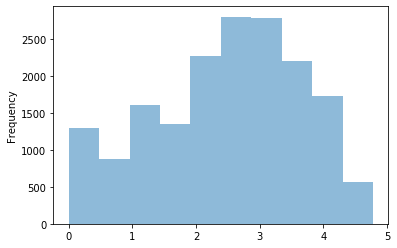

In [76]:
n = np.log(y_train)
n.plot.hist(bins=10, alpha=0.5)


In [77]:
reg = ensemble.GradientBoostingRegressor(**params)
reg.fit(x_train_pca, n)

mse = mean_squared_error(y_test, reg.predict(x_test_pca))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

y_pred = reg.predict(x_test_pca)

mse = math.sqrt(mean_squared_error(y_test, np.exp(y_pred)))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

The mean squared error (MSE) on test set: 786.5802
The mean squared error (MSE) on test set: 22.2657


In [80]:
pd.DataFrame(x_train).to_csv('x_train_analysis.csv')